In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import csv to be plotted
df_plots = pd.read_csv('../data/cleaned_data/us_accidents_cleaned.csv')

In [3]:
# Check preview of data
df_plots.head()

,severity,start_lat,start_lng,description,city,county,state,temperature(f),humidity(%),visibility(mi),...,precipitation(in),weather_condition,crossing,junction,traffic_signal,sunrise_sunset,year,month,day,time
0,2,37.530804,-122.297714,Accident on 39th Ave at Edison St.,San Mateo,San Mateo,CA,69.8,56.0,9.0,...,0.0,Clear,False,False,False,Day,2016,July,1,13:17:37
1,2,27.960699,-82.705109,Accident on Bayshore Blvd at FL-60 Gulf To Bay...,Clearwater,Pinellas,FL,84.0,82.0,9.0,...,0.0,Fair,True,False,True,Day,2019,June,26,08:17:21
2,2,37.701230,-121.834055,Stationary traffic on I-580 W from Airway Blvd...,Livermore,Alameda,CA,68.0,39.0,10.0,...,0.0,Fair,False,False,False,Day,2022,February,19,13:59:30
3,2,42.385570,-83.261400,At I-96 Local/Outer Dr/Exit 180 - Accident.,Detroit,Wayne,MI,67.5,85.0,10.0,...,0.0,Clear,False,True,False,Day,2018,August,20,07:36:17
4,2,38.347090,-112.659636,At I-15-BL/1400 St/Exit 112 - Accident.,Beaver,Beaver,UT,26.6,80.0,10.0,...,0.0,Mostly Cloudy,False,False,False,Day,2019,February,17,09:48:00


### Plotting number of crashes by hour
To be able to do this we need to extract the hours out of the time column. Before we can do that we need to convert it from int to datetime. 

In [4]:
# 1. Convert the 'time' column to datetime format
df_plots['time'] = pd.to_datetime(df_plots['time'])

C:\Users\Steven\AppData\Local\Temp\ipykernel_16112\194355731.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_plots['time'] = pd.to_datetime(df_plots['time'])


In [5]:
# Extract the hour (HH) from data
df_plots['hour'] = df_plots['time'].dt.hour

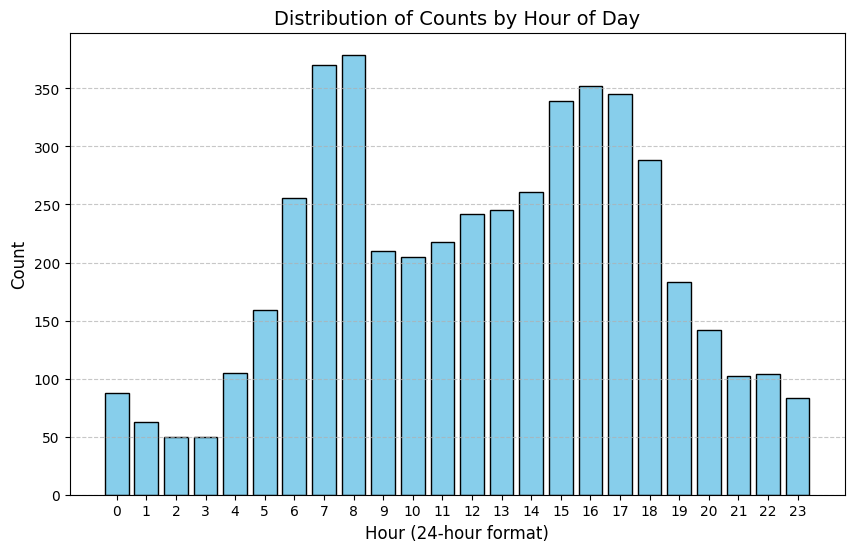

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df_plots['hour'], bins=range(25), rwidth=0.8, color='skyblue', edgecolor='black', align='left')


plt.title('Distribution of Counts by Hour of Day', fontsize=14)
plt.xlabel('Hour (24-hour format)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

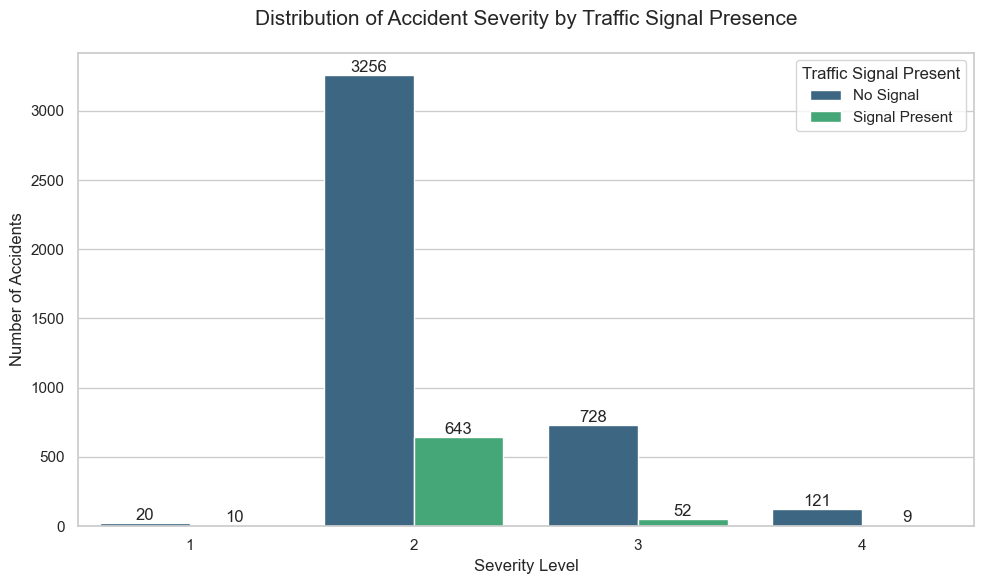

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(
    data=df_plots, 
    x='severity', 
    hue='traffic_signal', 
    palette='viridis'
    )
plt.title('Distribution of Accident Severity by Traffic Signal Presence', fontsize=15, pad=20)
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(title='Traffic Signal Present', labels=['No Signal', 'Signal Present'])
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()